In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/quikr_car - quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
df.shape

(892, 6)

In [ ]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [ ]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [ ]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [ ]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [ ]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [ ]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [ ]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [ ]:
df.duplicated().sum()

94

In [ ]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [ ]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [ ]:
X_train['company'].value_counts()

company
Maruti        156
Hyundai        98
Mahindra       63
Tata           49
Honda          41
Renault        32
Chevrolet      25
Ford           23
Toyota         22
Volkswagen     10
Skoda           9
Datsun          7
Audi            6
Mitsubishi      5
Mini            5
Nissan          4
BMW             3
Hindustan       3
Mercedes        3
Jaguar          2
Fiat            2
Force           2
Land            1
Name: count, dtype: int64

<Axes: ylabel='Price'>

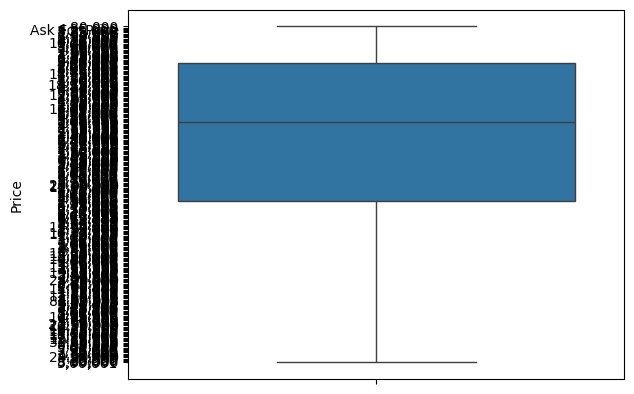

In [ ]:
sns.boxplot(data=df['Price'])

In [ ]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [ ]:
label.fit(df.fuel_type)
df.fuel_type=label.transform(df.fuel_type)

In [ ]:
label.fit(df.kms_driven)
df.kms_driven=label.transform(df.kms_driven)

In [ ]:
label.fit(df.Price)
df.Price=label.transform(df.Price)

In [ ]:
label.fit(df.year)
df.year=label.transform(df.year)

In [ ]:
label.fit(df.company)
df.company=label.transform(df.company)

In [ ]:
label.fit(df.name)
df.name=label.transform(df.name)

In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,154,14,13,257,152,2
1,204,20,12,155,141,0
2,254,21,24,273,76,2
3,143,14,20,113,91,2
4,61,11,20,204,122,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   name        892 non-null    int64
 1   company     892 non-null    int64
 2   year        892 non-null    int64
 3   Price       892 non-null    int64
 4   kms_driven  892 non-null    int64
 5   fuel_type   892 non-null    int64
dtypes: int64(6)
memory usage: 41.9 KB


In [ ]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

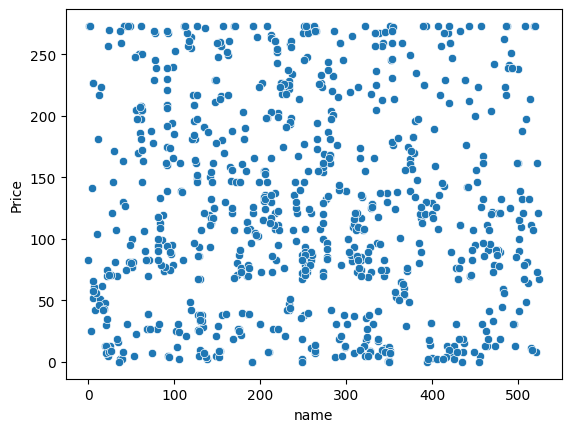

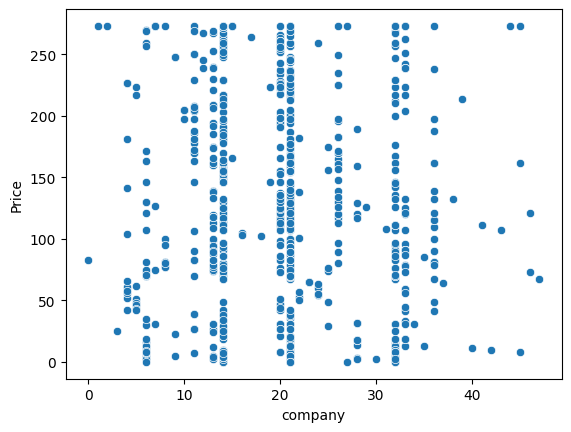

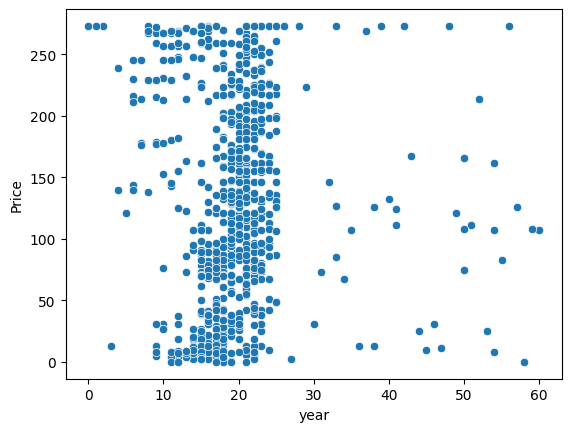

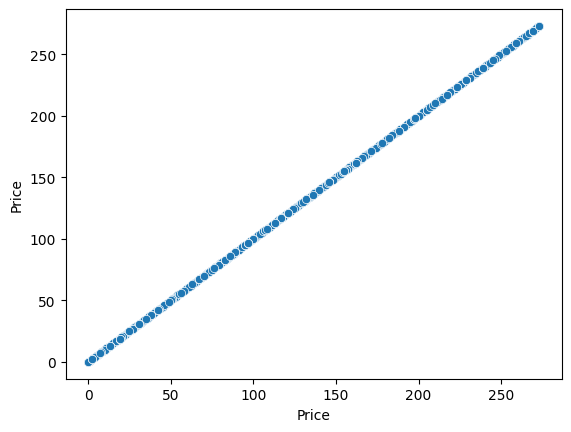

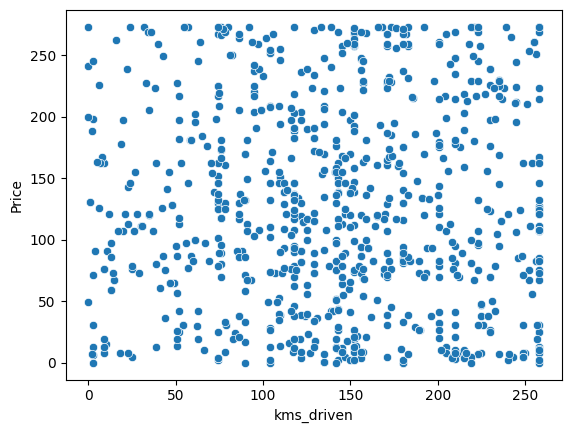

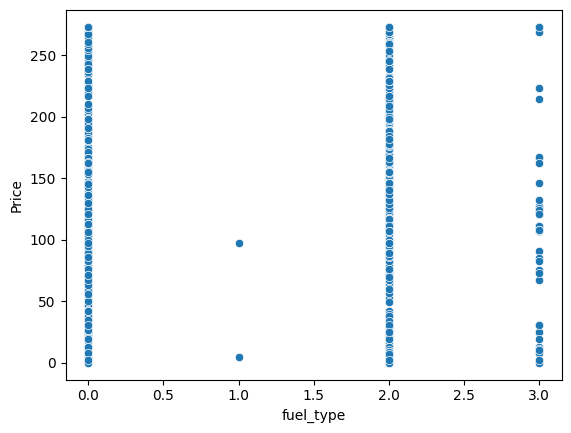

In [ ]:
for col in df:
    sns.scatterplot(data=df, x=col, y='Price')
    plt.show()

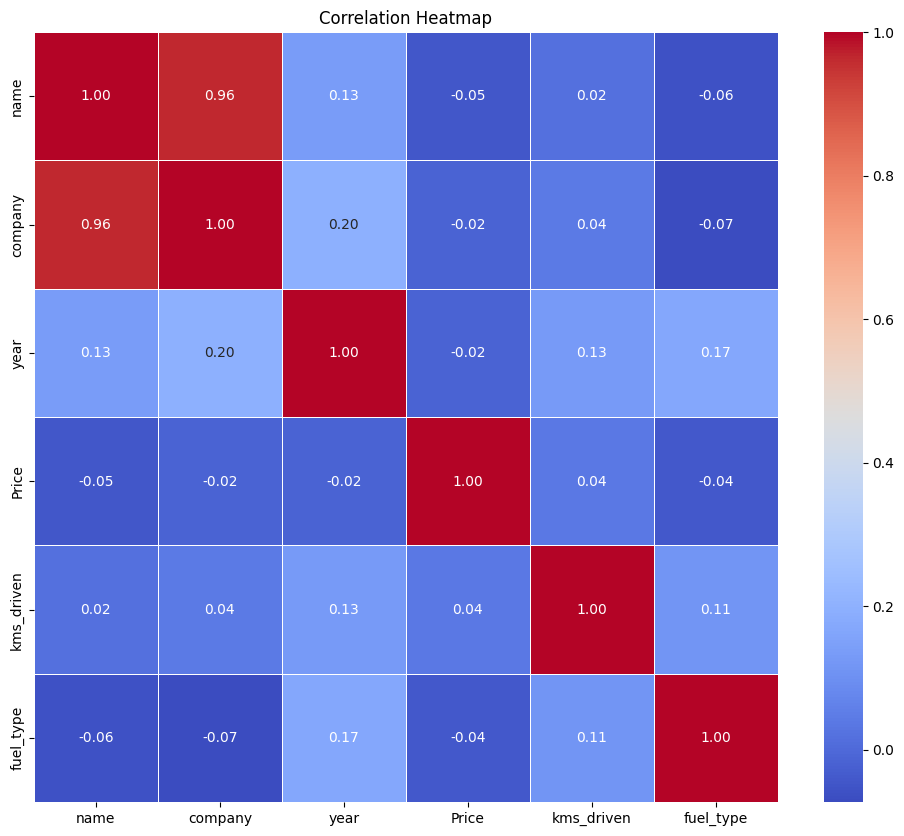

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
columns_to_sort=['fuel_type','company','kms_driven','year']

In [ ]:
independent_data_for_model=df[columns_to_sort]
independent_data_for_model.head()

,fuel_type,company,kms_driven,year
0,2,14,152,13
1,0,20,141,12
2,2,21,76,24
3,2,14,91,20
4,0,11,122,20


In [ ]:
x=df[['fuel_type','company','kms_driven','year']]
y=df.Price

In [ ]:
x

,fuel_type,company,kms_driven,year
0,2,14,152,13
1,0,20,141,12
2,2,21,76,24
3,2,14,91,20
4,0,11,122,20
...,...,...,...,...
887,3,31,258,59
888,0,32,90,24
889,0,20,142,19
890,3,13,257,20


In [ ]:
y

0      257
1      155
2      273
3      113
4      204
      ... 
887    108
888     86
889    136
890     31
891     19
Name: Price, Length: 892, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linre=LinearRegression()
linre

LinearRegression()

In [ ]:
linre.fit(x,y)

LinearRegression()

In [ ]:
value=[[2,88.6,168.8,64.1]]
predicted=linre.predict(value)
print(predicted)

[106.11926847]


In [ ]:
linre.score(x,y)

0.004229842775580472

In [ ]:
x.head(1)

,fuel_type,company,kms_driven,year
0,2,14,152,13


In [ ]:
y.head(1)

0    257
Name: Price, dtype: int64

**Result analysis**

The Score of created ML model is good.

The predicted value lies closer to the actual value, So The created ML model is working good.